<a href="https://colab.research.google.com/github/syn294/H8_PTP_Final_Image/blob/master/CatDog_Classifications_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Install* Tensorflow GPU versi 2.1.0

In [1]:
pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 21kB/s 
     |████████████████████████████████| 450kB 32.0MB/s 
     |████████████████████████████████| 3.8MB 57.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


### *Import* modul-modul 

In [0]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [3]:
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

Using TensorFlow backend.


### Cek versi tensorflow

In [4]:
print(tf.__version__)

2.1.0


### Sambungkan ke google drive 

In [0]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### *Generate* file-file untuk training dengan DataFrame

In [0]:
filenames = (os.listdir("/content/drive/My Drive/Colab Notebooks/final_project/train"))
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

In [0]:
train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

### Contoh file *training*

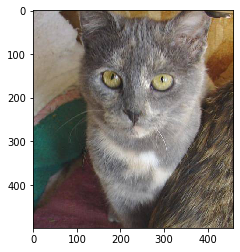

In [56]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/Colab Notebooks/final_project/train/"+sample)
plt.imshow(image)

In [57]:
train_df

,filename,category
0,cat.589.jpg,cat
1,cat.586.jpg,cat
2,cat.585.jpg,cat
3,cat.587.jpg,cat
4,cat.584.jpg,cat
...,...,...
1995,dog.234.jpg,dog
1996,dog.238.jpg,dog
1997,dog.240.jpg,dog
1998,dog.245.jpg,dog


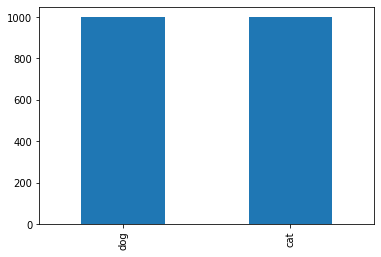

In [58]:
train_df['category'].value_counts().plot.bar()

Ada 1000 file gambar anjing dan 1000 file gambar kucing

### *Generate* file-file untuk validasi

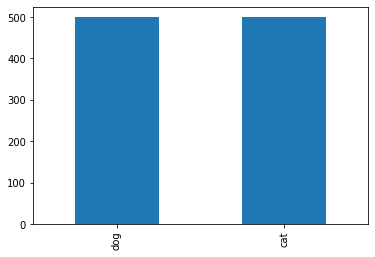

In [59]:
filenames_val = os.listdir("/content/drive/My Drive/Colab Notebooks/final_project/validation")
categories_val = []
for filename in filenames_val:
    category = filename.split('.')[0]
    if category == 'dog':
        categories_val.append('dog')
    else:
        categories_val.append('cat')

validate_df = pd.DataFrame({
    'filename': filenames_val,
    'category': categories_val
})

validate_df['category'].value_counts().plot.bar()

Ada 500 gambar anjing dan 500 gambar kucing

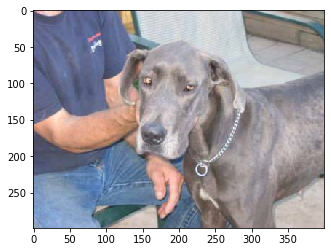

In [60]:
sample = random.choice(filenames_val)
image = load_img("/content/drive/My Drive/Colab Notebooks/final_project/validation/"+sample)
plt.imshow(image)

### Buat konstanta 

In [0]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 8

### *Train* file untuk training

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)

In [63]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/My Drive/Colab Notebooks/final_project/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 2000 validated image filenames belonging to 2 classes.


### File untuk validasi

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
validation_gen = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/My Drive/Colab Notebooks/final_project/validation",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 1000 validated image filenames belonging to 2 classes.


In [66]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/My Drive/Colab Notebooks/final_project/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE
)

Found 1 validated image filenames belonging to 1 classes.


### Contoh gambar training yang sudah di-augmentasi

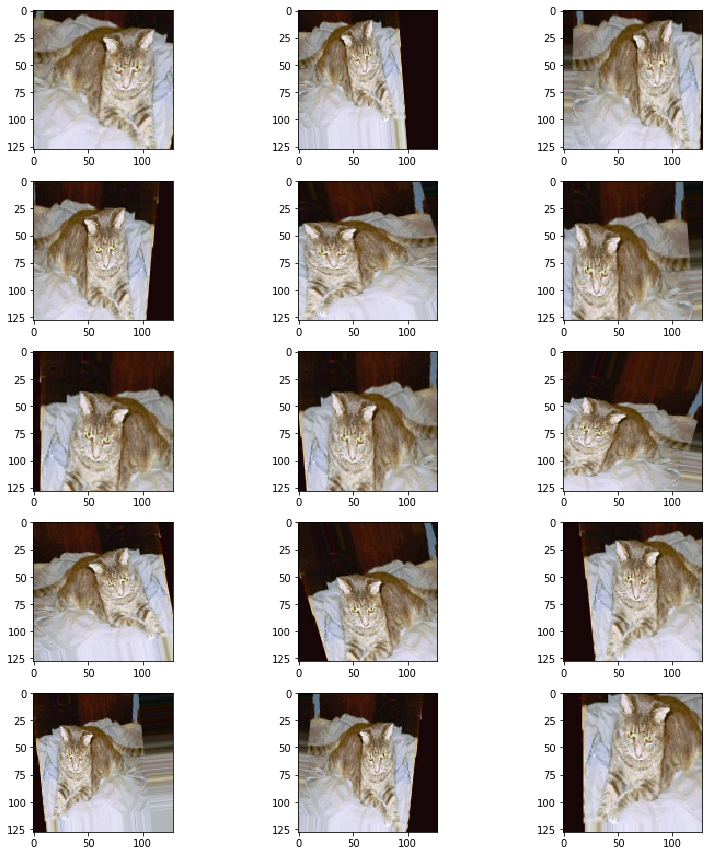

In [67]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### Membuat model dengan layer-layer dan di-*compile*



In [72]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3), padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), activation="selu", kernel_initializer="lecun_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(32,(3,3), padding="same", activation="selu", kernel_initializer="lecun_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(32, activation="selu", kernel_initializer="lecun_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Dense(2, activation='softmax')
        
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=0.0005, epsilon=1e-05),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      864       
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9216      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)       

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

### Fit file training dan validasi ke model

In [74]:
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=validation_gen,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 125 steps
Epoch 1/200
250/250 [==============================] - 1509s 6s/step - loss: 0.9110 - accuracy: 0.5405 - val_loss: 0.9931 - val_accuracy: 0.5150
Epoch 2/200
250/250 [==============================] - 18s 74ms/step - loss: 0.7934 - accuracy: 0.5605 - val_loss: 0.7968 - val_accuracy: 0.5710
Epoch 3/200
250/250 [==============================] - 18s 74ms/step - loss: 0.7516 - accuracy: 0.5650 - val_loss: 0.7876 - val_accuracy: 0.5330
Epoch 4/200
250/250 [==============================] - 19s 76ms/step - loss: 0.7190 - accuracy: 0.5790 - val_loss: 0.7912 - val_accuracy: 0.5940
Epoch 5/200
250/250 [==============================] - 19s 74ms/step - loss: 0.7125 - accuracy: 0.5910 - val_loss: 0.8461 - val_accuracy: 0.5520
Epoch 6/200
250/250 [==============================] - 18s 74ms/step - loss: 0.6992 - accuracy: 0.5865 - val_loss: 0.6775 - val_accuracy: 0.6460
Epoch 7/200
250/250 [===============

### Dapatkan nilai validasi model

In [75]:
model.evaluate(validation_gen)

  ...
    to  
  ['...']
125/125 [==============================] - 3s 28ms/step - loss: 0.5394 - accuracy: 0.7360


[0.5394476630091667, 0.736]

Hasil akurasi model yang diperoleh tidak terlalu besar, diperkirakan merupakan akibat dari jumlah data training yang tidak terlalu banyak

In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot perubahan nilai *loss* dan *accuracy* dari training dan validasi sepanjang *epoch*

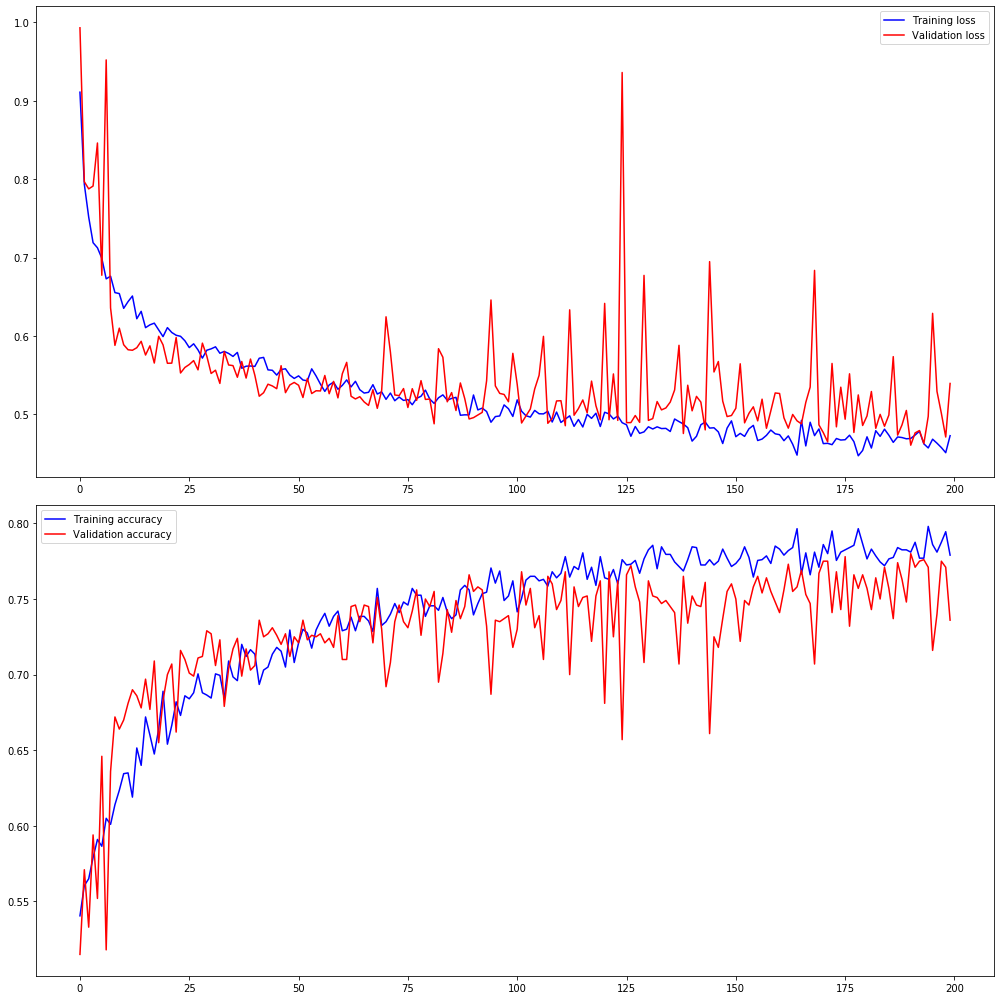

In [105]:
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
plt.plot(history.history['loss'], color='blue', label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation accuracy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Kedua gambar memperlihatkan grafik yang saling dekat, antara grafik *Training loss*-*Validation loss* dan *Training accuracy*-*validation accuracy* 

### Persiapkan file-file untuk diprediksi dengan model

In [0]:
filenames_test = os.listdir("/content/drive/My Drive/Colab Notebooks/final_project/test")

test_df = pd.DataFrame({
    'filename': filenames_test
})

nb_samples = test_df.shape[0]

In [121]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/Colab Notebooks/final_project/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 22 validated image filenames.


### Prediksi dengan model

In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/BATCH_SIZE))

In [0]:
test_df['category'] = np.argmax(predict, axis=-1)

In [0]:
test_df['category'] = test_df['category'].replace({ 1: 'dog', 0: 'cat' })

### Tampilkan hasil prediksi model dalam DataFrame

In [0]:
test_dataframe = test_df.sort_values(by='filename').reset_index(drop=True)

In [169]:
test_dataframe

,filename,category
0,cat.1.jpg,dog
1,cat.10.jpg,cat
2,cat.11.jpg,cat
3,cat.2.jpg,cat
4,cat.3.jpg,cat
5,cat.4.jpg,cat
6,cat.5.jpg,cat
7,cat.6.jpg,dog
8,cat.7.jpg,cat
9,cat.8.jpg,dog


### Tampilkan gambar prediksi beserta hasil prediksi

In [0]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

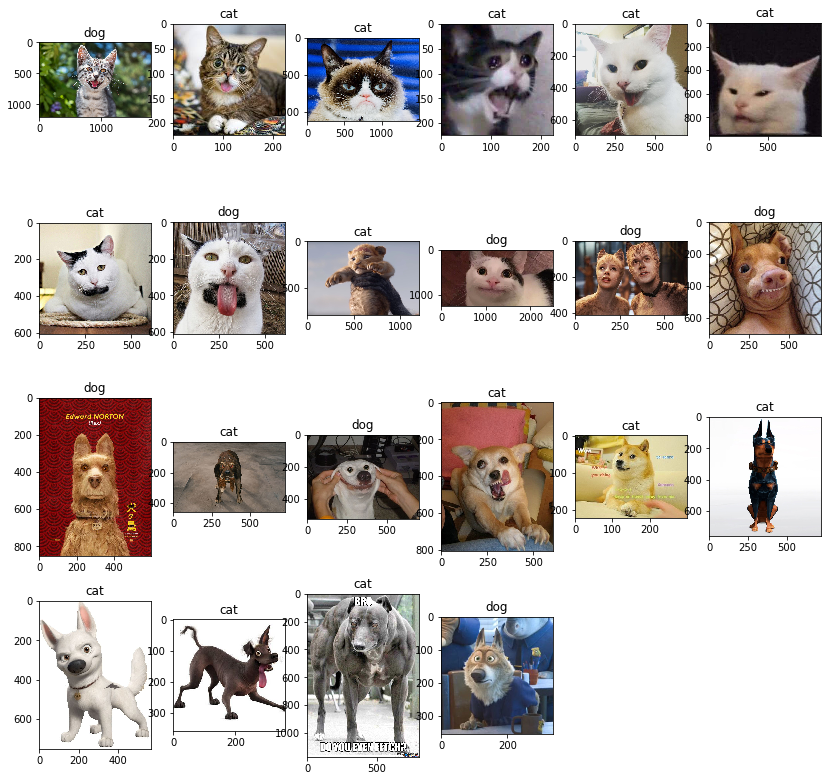

In [170]:
plt.figure(figsize=(14, 14))
plt.subplot(461)
img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.1.jpg')
plt.title(test_dataframe['category'][0])
plt.imshow(img)

plt.subplot(462)
img1 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.10.jpg')
plt.title(test_dataframe['category'][1])
plt.imshow(img1)

plt.subplot(463)
img2 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.11.jpg')
plt.title(test_dataframe['category'][2])
plt.imshow(img2)

plt.subplot(464)
img3 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.2.jpg')
plt.title(test_dataframe['category'][3])
plt.imshow(img3)

plt.subplot(465)
img4 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.3.jpg')
plt.title(test_dataframe['category'][4])
plt.imshow(img4)

plt.subplot(466)
img5 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.4.jpg')
plt.title(test_dataframe['category'][5])
plt.imshow(img5)

plt.subplot(467)
img6 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.5.jpg')
plt.title(test_dataframe['category'][6])
plt.imshow(img6)

plt.subplot(468)
img7 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.6.jpg')
plt.title(test_dataframe['category'][7])
plt.imshow(img7)

plt.subplot(469)
img8 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.7.jpg')
plt.title(test_dataframe['category'][8])
plt.imshow(img8)

plt.subplot(4,6,10)
img9 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.8.jpg')
plt.title(test_dataframe['category'][9])
plt.imshow(img9)

plt.subplot(4,6,11)
img10 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/cat.9.jpg')
plt.title(test_dataframe['category'][10])
plt.imshow(img10)

plt.subplot(4,6,12)
img11 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.1.jpg')
plt.title(test_dataframe['category'][11])
plt.imshow(img11)

plt.subplot(4,6,13)
img12 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.10.jpg')
plt.title(test_dataframe['category'][12])
plt.imshow(img12)

plt.subplot(4,6,14)
img13 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.11.jpg')
plt.title(test_dataframe['category'][13])
plt.imshow(img13)

plt.subplot(4,6,15)
img14 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.2.jpg')
plt.title(test_dataframe['category'][14])
plt.imshow(img14)

plt.subplot(4,6,16)
img15 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.3.jpg')
plt.title(test_dataframe['category'][15])
plt.imshow(img15)

plt.subplot(4,6,17)
img16 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.4.jpg')
plt.title(test_dataframe['category'][16])
plt.imshow(img16)

plt.subplot(4,6,18)
img17 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.5.jpg')
plt.title(test_dataframe['category'][17])
plt.imshow(img17)

plt.subplot(4,6,19)
img18 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.6.jpg')
plt.title(test_dataframe['category'][18])
plt.imshow(img18)

plt.subplot(4,6,20)
img19 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.7.jpg')
plt.title(test_dataframe['category'][19])
plt.imshow(img19)

plt.subplot(4,6,21)
img20 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.8.jpg')
plt.title(test_dataframe['category'][20])
plt.imshow(img20)

plt.subplot(4,6,22)
img21 = mpimg.imread('/content/drive/My Drive/Colab Notebooks/final_project/test/dog.9.jpg')
plt.title(test_dataframe['category'][21])
plt.imshow(img21)

### Hasil Prediksi

In [0]:
correct_guess_cat = 7/11
correct_guess_dog = 4/11
correct_guess_total = 11/22

### Simpan hasil model

In [0]:
model.save("final_project_colab_final.h5")
model.save_weights(filepath='/content/drive/My Drive/Colab Notebooks/final_project')